# **Real-World Data Cleaning + EDA (Exploratory Data Analysis)**
### **Objectives:**
#### - Learn how to handle messy datasets
#### - Clean, Preprocess and extract insights
#### - Perform a **full exploratory data** analysis on a Real Dataset
#### - Set the Foundation for basic machine learning & analytics

### **1. Importing the Dataset**

In [2]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **2. Exploring the Dataset**

Basic Overview


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Shape, Column, Dtype

In [6]:
df.shape

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### **2. Data Cleaning Steps**

Step 1: Handling Missing Data

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Filling the missing values in 'director' and 'cast' columns with 'Unknown' and 'Not Listed' respectively
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Listed', inplace=True)

In [21]:
# Drop country column as it has too many missing values
df.dropna(subset=['country'], inplace=True)

Step 2: Format Standardisation 

In [14]:
df['type'].unique() # Consistency check for 'type' column

array(['Movie', 'TV Show'], dtype=object)

In [15]:
df['type'] = df['type'].str.title()  # Standardizing 'type' to title case

Step 3: Duplicates Removal

In [17]:
df.duplicated().sum()  # Check for duplicates
df.drop_duplicates(inplace=True)  # Remove duplicates

### **3. Visual EDA**

Number of Shows by Type 

<Axes: xlabel='type', ylabel='count'>

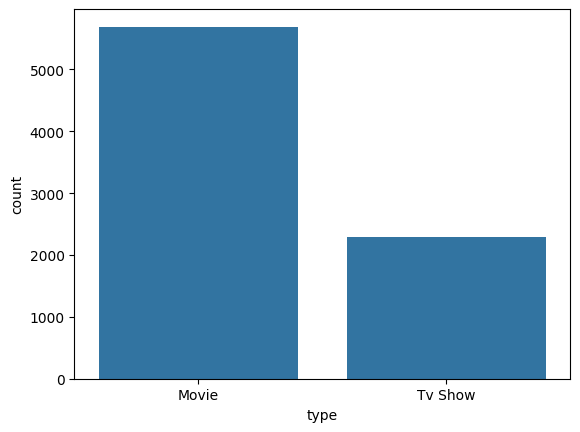

In [ ]:
import seaborn as sns
sns.countplot(x='type', data=df)

Shows per Country

<Axes: ylabel='country'>

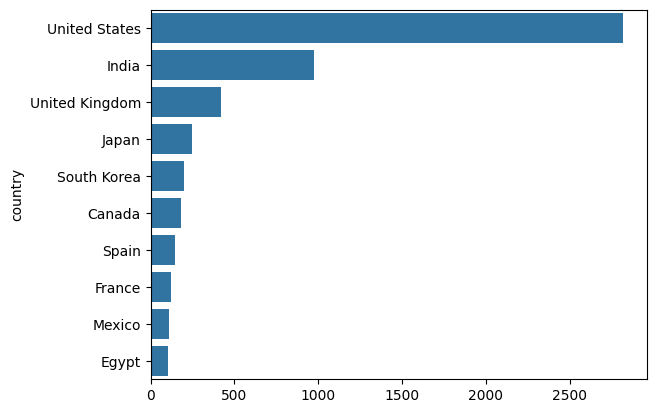

In [22]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)

Genre Analysis

In [25]:
df['listed_in'].value_counts().head(10)

listed_in
Documentaries                                       343
Dramas, International Movies                        337
Stand-Up Comedy                                     303
Comedies, Dramas, International Movies              260
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  181
Kids' TV                                            176
Documentaries, International Movies                 165
Dramas, International Movies, Romantic Movies       163
Comedies, International Movies                      155
Name: count, dtype: int64

<Axes: ylabel='listed_in'>

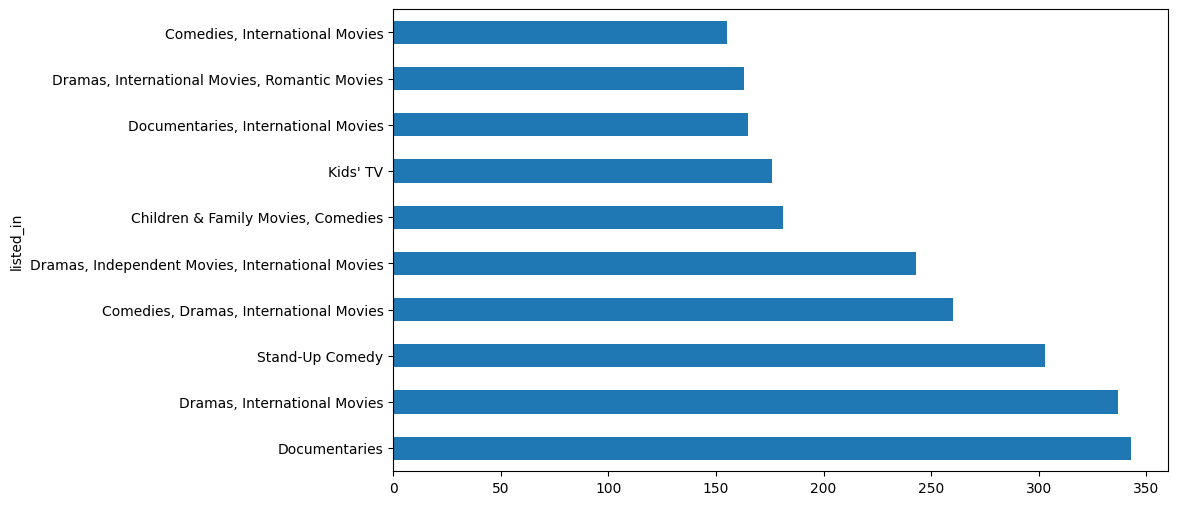

In [26]:
df['listed_in'].value_counts().head(10).plot(kind='barh', figsize=(10, 6))

Word Cloud

In [27]:
!pip install wordcloud

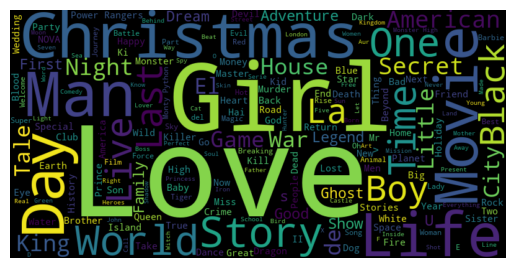

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['title'])
wordcloud= WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='release_year', ylabel='duration'>

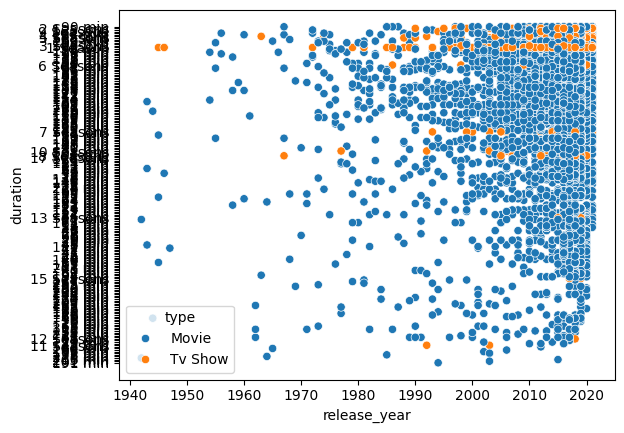